Survey Questions:						
For each question, rate on a scale from 1 to 7.  (1= Completely disagree; 7 = Completely agree)						
Q1	I enjoy writing.					
Q2	Writing well is an important factor in professional advancement.					
Q3	Seeing errors in other people's writing annoys me.					
Q4	I proofread meticulously before sending emails.					
Q5	I proofread meticulously before posting on social media.					
Q6	It's likely that I'd recommend Grammarly to a friend.					

In [110]:
import datetime
import itertools
import io
import re
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats
from scipy.stats import zscore
import scipy.cluster.hierarchy as sch
import sys
import csv
import matplotlib.pyplot as plt
from sklearn.neighbors import DistanceMetric
from sklearn.cluster import AgglomerativeClustering 
import seaborn as sns

In [83]:
df = pd.read_csv('/Users/ajbattan/Downloads/survey_data.csv')
df.head()

,Customer ID,Q1,Q2,Q3,Q4,Q5,Q6,Income,LTV
0,A,6,4,7,3,2,3,"$ 60,000",$ 195
1,B,2,3,1,4,5,4,"$ 30,000",$ 65
2,C,7,2,6,4,1,3,"$ 70,000",$ 195
3,D,4,6,4,5,3,6,"$ 30,000",$ 455
4,E,1,3,2,2,6,4,"$ 60,000",$ 65


In [84]:
df.dtypes

Customer ID    object
Q1              int64
Q2              int64
Q3              int64
Q4              int64
Q5              int64
Q6              int64
Income         object
LTV            object
dtype: object

In [85]:
df['Income'] = df['Income'].astype(str).str.replace(',', '').str.replace('$', '').astype(int)
df['LTV'] = df['LTV'].astype(str).str.replace('$', '').str.replace('-','0').astype(int)

In [76]:
df.head()

,Customer ID,Q1,Q2,Q3,Q4,Q5,Q6,Income,LTV
0,A,6,4,7,3,2,3,60000,195
1,B,2,3,1,4,5,4,30000,65
2,C,7,2,6,4,1,3,70000,195
3,D,4,6,4,5,3,6,30000,455
4,E,1,3,2,2,6,4,60000,65


In [86]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Income,LTV
count,40.000000,40.000000,40.000000,40.000000,40.0000,40.000000,40.00000,40.000000
mean,3.850000,4.100000,3.950000,4.100000,3.4500,4.350000,46000.00000,211.250000
std,1.874936,1.392286,1.986493,1.498717,1.7387,1.477177,17216.56924,126.408729
min,1.000000,2.000000,1.000000,2.000000,1.0000,2.000000,25000.00000,0.000000
25%,2.000000,3.000000,2.000000,3.000000,2.0000,3.000000,30000.00000,130.000000
50%,4.000000,4.000000,4.000000,4.000000,3.5000,4.000000,42500.00000,195.000000
75%,5.250000,5.000000,6.000000,5.250000,4.2500,5.250000,60000.00000,276.250000
max,7.000000,7.000000,7.000000,7.000000,7.0000,7.000000,80000.00000,455.000000


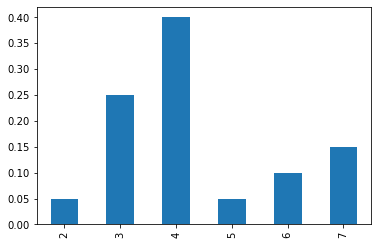

In [87]:
df['Q6'].value_counts(normalize=True).sort_index().plot(kind='bar')

In [88]:
df_z = df.copy()
df.head()

,Customer ID,Q1,Q2,Q3,Q4,Q5,Q6,Income,LTV
0,A,6,4,7,3,2,3,60000,195
1,B,2,3,1,4,5,4,30000,65
2,C,7,2,6,4,1,3,70000,195
3,D,4,6,4,5,3,6,30000,455
4,E,1,3,2,2,6,4,60000,65


In [89]:
df_z[['Income']] = df_z[['Income']].apply(zscore)
df_z[['LTV']] = df_z[['LTV']].apply(zscore)
df_z.drop(df_z.columns[[0]],axis = 1, inplace = True)
df_z.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Income,LTV
0,6,4,7,3,2,3,0.823529,-0.130189
1,2,3,1,4,5,4,-0.941176,-1.171700
2,7,2,6,4,1,3,1.411765,-0.130189
3,4,6,4,5,3,6,-0.941176,1.952834
4,1,3,2,2,6,4,0.823529,-1.171700


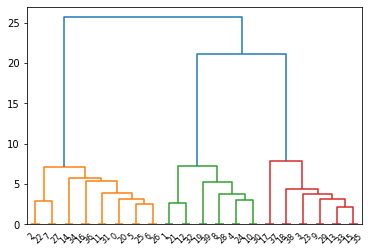

In [91]:
dendrogram = sch.dendrogram(sch.linkage(df_z, method  = "ward"))

In [92]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(df_z)
y_hc

array([1, 2, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 2])

In [94]:
df['cluster_num'] = y_hc.tolist()
df.head()

,Customer ID,Q1,Q2,Q3,Q4,Q5,Q6,Income,LTV,cluster_num
0,A,6,4,7,3,2,3,60000,195,1
1,B,2,3,1,4,5,4,30000,65,2
2,C,7,2,6,4,1,3,70000,195,1
3,D,4,6,4,5,3,6,30000,455,0
4,E,1,3,2,2,6,4,60000,65,2


In [98]:
df_c1 = df.loc[df['cluster_num'] == 0].copy()
df_c2 = df.loc[df['cluster_num'] == 1].copy()
df_c3 = df.loc[df['cluster_num'] == 2].copy()

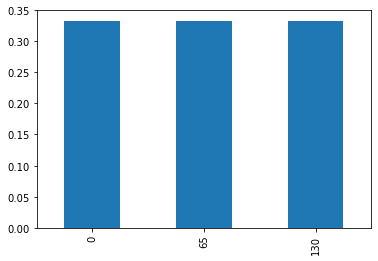

In [108]:
df_c3['LTV'].value_counts(normalize=True).sort_index().plot(kind='bar')

In [102]:
df_c1.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Income,LTV,cluster_num
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.0
mean,3.500000,5.833333,3.333333,6.000000,3.500000,6.000000,30833.333333,357.5,0.0
std,0.522233,0.717741,0.778499,0.603023,0.797724,1.477098,5573.204290,65.0,0.0
min,3.000000,5.000000,2.000000,5.000000,2.000000,3.000000,25000.000000,260.0,0.0
25%,3.000000,5.000000,3.000000,6.000000,3.000000,6.000000,25000.000000,325.0,0.0
50%,3.500000,6.000000,3.500000,6.000000,4.000000,6.500000,30000.000000,357.5,0.0
75%,4.000000,6.000000,4.000000,6.000000,4.000000,7.000000,35000.000000,390.0,0.0
max,4.000000,7.000000,4.000000,7.000000,4.000000,7.000000,40000.000000,455.0,0.0


In [103]:
df_c2.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Income,LTV,cluster_num
count,16.00,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.0
mean,5.75,3.625000,6.000000,3.125000,1.875000,3.875000,60000.00000,211.250000,1.0
std,1.00,0.885061,1.032796,0.806226,0.806226,0.619139,10954.45115,44.403453,0.0
min,4.00,2.000000,4.000000,2.000000,1.000000,3.000000,45000.00000,130.000000,1.0
25%,5.00,3.000000,5.750000,2.750000,1.000000,3.750000,53750.00000,195.000000,1.0
50%,6.00,4.000000,6.000000,3.000000,2.000000,4.000000,57500.00000,195.000000,1.0
75%,6.25,4.000000,7.000000,4.000000,2.250000,4.000000,66250.00000,260.000000,1.0
max,7.00,5.000000,7.000000,4.000000,3.000000,5.000000,80000.00000,260.000000,1.0


In [111]:
df_c3.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Income,LTV,cluster_num
count,12.000000,12.000000,12.000000,12.0,12.0,12.000000,12.000000,12.000000,12.0
mean,1.666667,3.000000,1.833333,3.5,5.5,3.333333,42500.000000,65.000000,2.0
std,0.492366,0.603023,0.717741,1.0,1.0,0.778499,17516.226244,55.432186,0.0
min,1.000000,2.000000,1.000000,2.0,4.0,2.000000,25000.000000,0.000000,2.0
25%,1.000000,3.000000,1.000000,3.0,5.0,3.000000,30000.000000,0.000000,2.0
50%,2.000000,3.000000,2.000000,3.5,5.5,3.500000,35000.000000,65.000000,2.0
75%,2.000000,3.000000,2.000000,4.0,6.0,4.000000,60000.000000,130.000000,2.0
max,2.000000,4.000000,3.000000,5.0,7.0,4.000000,70000.000000,130.000000,2.0


In [117]:
df_plot = df.copy()

In [118]:
df_plot.drop(df_plot.columns[[0]],axis = 1, inplace = True)
df_plot.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Income,LTV,cluster_num
0,6,4,7,3,2,3,60000,195,1
1,2,3,1,4,5,4,30000,65,2
2,7,2,6,4,1,3,70000,195,1
3,4,6,4,5,3,6,30000,455,0
4,1,3,2,2,6,4,60000,65,2


In [112]:
sns.set(style="ticks")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


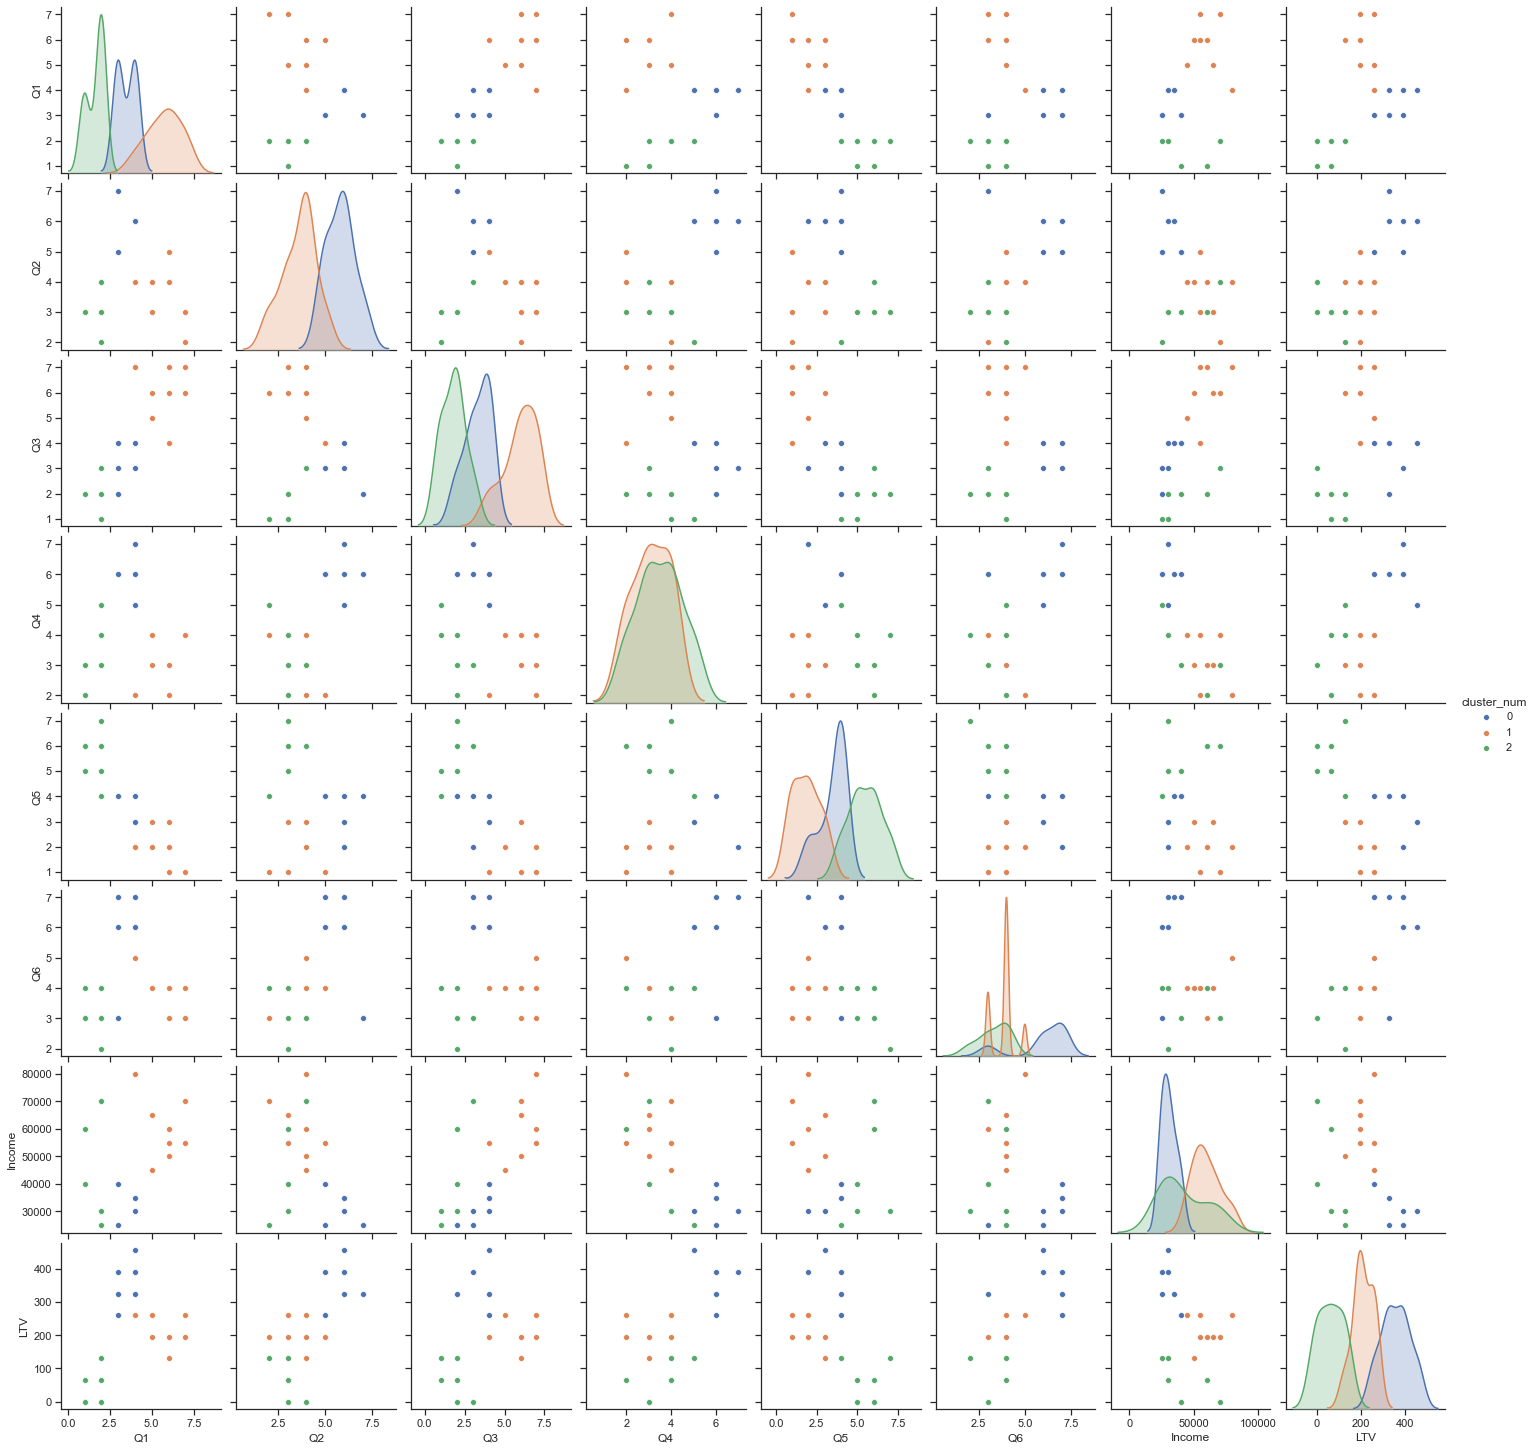

In [127]:
sns.pairplot(df_plot, hue = 'cluster_num')

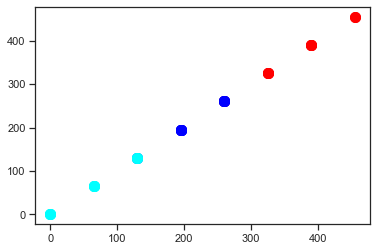

In [130]:
plt.scatter(df_c1.LTV, df_c1.LTV, s=100, c='red', label ='Cluster 1')
plt.scatter(df_c2.LTV, df_c2.LTV, s=100, c='blue', label ='Cluster 2')
plt.scatter(df_c3.LTV, df_c3.LTV, s=100, c='cyan', label ='Cluster 3')
plt.show()